In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pdb

sns.set_style("whitegrid")
sns.set_context("poster")

In [158]:
df = pd.DataFrame.from_csv("data/2015_spring_summaries.csv", index_col=None)
df = df.rename(columns={"course": "course_full"})
df["course"] = [x.split(":")[0] for x in df.course_full]
interesting_cols = ["course_full", "enrolled", "reviews", "overall_mean", "workload_mean", "difficulty"]

### Incorporating difficulty ratings

In [134]:
diff = pd.DataFrame.from_csv("data/q_diff_modified.csv", index_col=None)

In [135]:
diff = diff.sort_values("year", ascending=False)
recent_diff = diff[diff.duplicated("course") != True]
recent_diff.head(3)

,course,year,difficulty
10346,NEUROBIO 98r,2013,3.08
5261,FRSEMR 25o,2013,2.29
5218,FRSEMR 24p,2013,2.10


In [136]:
mean_diff = diff.groupby("course", as_index=False).agg({"difficulty": [np.mean, np.size]})
mean_diff = mean_diff.rename(columns={"difficulty": "mean_difficulty"})
mean_diff.head(3)

course mean_difficulty     
                            mean size
0  AESTH&INTP 11        2.966667    3
1  AESTH&INTP 12        3.060000    2
2  AESTH&INTP 13        2.302000    5

In [137]:
combined_diff = pd.merge(recent_diff, mean_diff, left_on="course", right_on="course")
combined_diff = combined_diff.rename(columns={"year": "most_recent_year"})
combined_diff.head(3)

,course,most_recent_year,difficulty,"(mean_difficulty, mean)","(mean_difficulty, size)"
0,NEUROBIO 98r,2013,3.08,3.174,5
1,FRSEMR 25o,2013,2.29,2.335,2
2,FRSEMR 24p,2013,2.10,1.720,3


In [138]:
df = pd.merge(df, combined_diff, on="course", how="left")
df.head(3)

,course_full,semester,enrolled,reviews,o1,o2,o3,o4,o5,overall_reviews,...,r3,r4,r5,recommend_reviews,recommend_mean,course,most_recent_year,difficulty,"(mean_difficulty, mean)","(mean_difficulty, size)"
0,APMTH 202: Physical Mathematics II,spring 2015,11,11,0,0,0,2,9,11,...,0,0,11,11,5.0,APMTH 202,2012,3.26,3.666667,3
1,FRSEMR 24K: The Surprising Science of Happiness,spring 2015,14,13,0,0,4,2,7,13,...,0,4,9,13,4.7,FRSEMR 24K,NaN,NaN,NaN,NaN
2,CHEM 301HF: Scientific Teaching and Communicat...,spring 2015,28,19,0,0,5,6,7,18,...,0,9,6,15,4.4,CHEM 301HF,NaN,NaN,NaN,NaN


Let's save this dataframe for easy sharing and loading in the future.

In [140]:
df.to_csv("data/course_summary_with_difficulty.csv", index=False)

#### Reloading dataframe

In [144]:
df = pd.DataFrame.from_csv("data/course_summary_with_difficulty.csv", index_col=None)

### Looking at classes with 10+ student reviews

In [151]:
ten_students = df[df.reviews >= 10]
ten_students.shape

(546, 30)

In [152]:
ten_students.head(3)

,course_full,semester,enrolled,reviews,o1,o2,o3,o4,o5,overall_reviews,...,r3,r4,r5,recommend_reviews,recommend_mean,course,most_recent_year,difficulty,"('mean_difficulty', 'mean')","('mean_difficulty', 'size')"
0,APMTH 202: Physical Mathematics II,spring 2015,11,11,0,0,0,2,9,11,...,0,0,11,11,5.0,APMTH 202,2012,3.26,3.666667,3
1,FRSEMR 24K: The Surprising Science of Happiness,spring 2015,14,13,0,0,4,2,7,13,...,0,4,9,13,4.7,FRSEMR 24K,NaN,NaN,NaN,NaN
2,CHEM 301HF: Scientific Teaching and Communicat...,spring 2015,28,19,0,0,5,6,7,18,...,0,9,6,15,4.4,CHEM 301HF,NaN,NaN,NaN,NaN


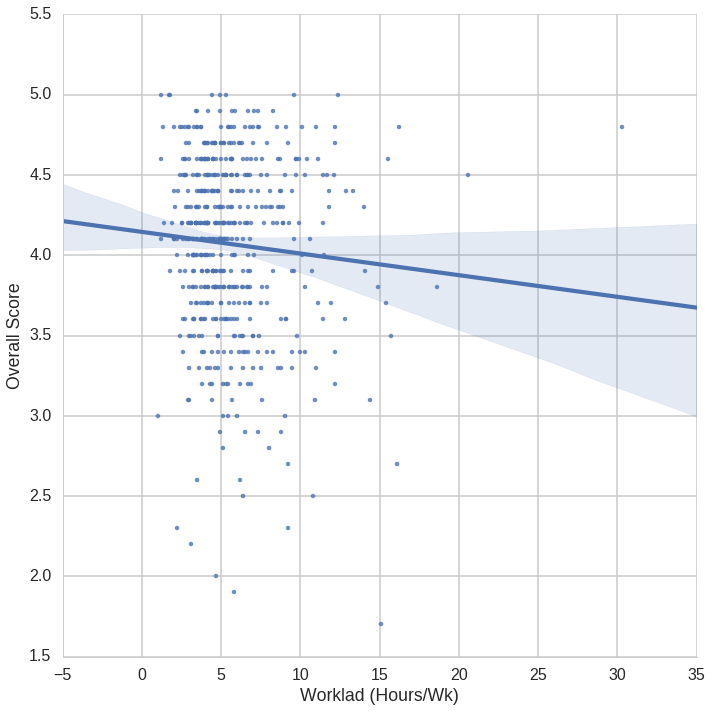

In [153]:
sns.lmplot(x="workload_mean", y="overall_mean", data=ten_students, size=10)
plt.xlabel("Worklad (Hours/Wk)")
plt.ylabel("Overall Score")

In [154]:
stats.linregress(ten_students.workload_mean, ten_students.overall_mean)

LinregressResult(slope=-0.013482189974706842, intercept=4.1455421478649628, rvalue=-0.073320674933453817, pvalue=0.086963775031911439, stderr=0.0078625609093634953)

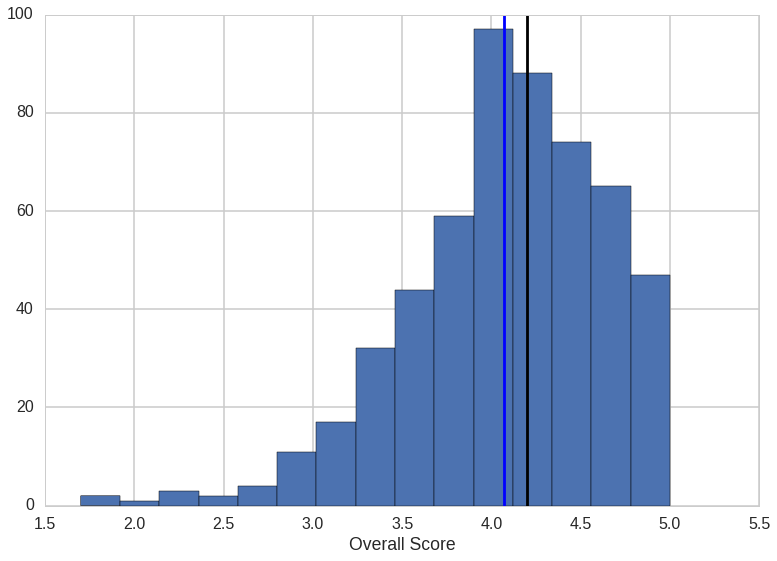

In [155]:
plt.hist(ten_students.overall_mean, bins=15)
plt.axvline(x=np.mean(ten_students.overall_mean))
plt.axvline(x=np.median(ten_students.overall_mean), color="k")
plt.xlabel("Overall Score")

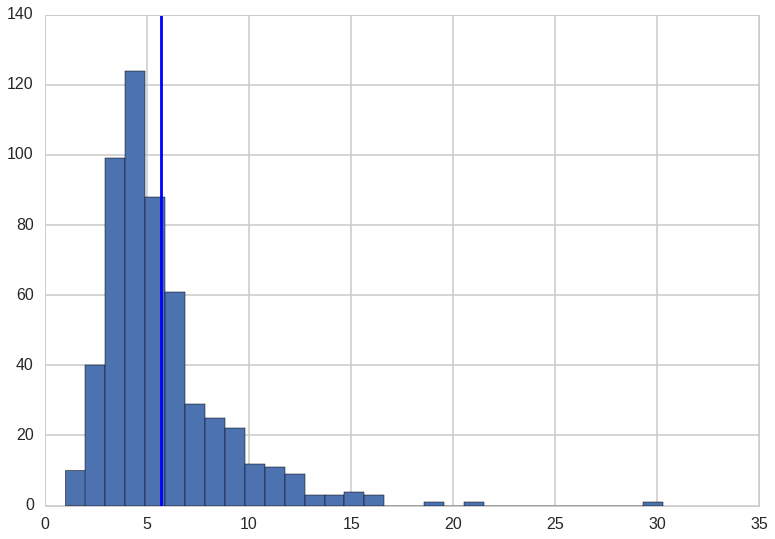

In [156]:
plt.hist(ten_students.workload_mean, bins=30)
plt.axvline(x=np.mean(ten_students.workload_mean))

In [159]:
ten_students.sort_values(["overall_mean", "reviews"], ascending=False)[interesting_cols]

,course_full,enrolled,reviews,overall_mean,workload_mean,difficulty
256,DRAMA 110: Beginning Acting,20,16,5.0,1.8,1.89
565,MUSIC 15HFR: Harvard Glee Club,20,15,5.0,4.9,NaN
833,WOMGEN 1272: Global Reproductive Health,14,14,5.0,4.4,NaN
429,ENGLISH CPWR: Poetry: Workshop,13,12,5.0,9.6,NaN
526,FRSEMR 41U: Museums,12,12,5.0,1.2,NaN
707,FRSEMR 21W: Research at the Harvard Forest: Gl...,11,11,5.0,1.7,NaN
784,FRSEMR 23K: Insights from Narratives of Illness,12,11,5.0,5.3,NaN
1055,ENGLISH CAPR: Poetry: Workshop,13,11,5.0,12.4,NaN
356,MUSIC 1: 1000 Years of Listening,57,48,4.9,3.4,NaN
585,SPANSH 126: Performing Latinidad,28,25,4.9,4.9,NaN


__Cool classes to keep track of__:
*  DRAMA 110: Beginning Acting